In [2]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설ㅊ

<ipython-input-36-d95849486bb6>:7: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, encoding='cp949')
<ipython-input-36-d95849486bb6>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # 결측값을 평균값으로 대체


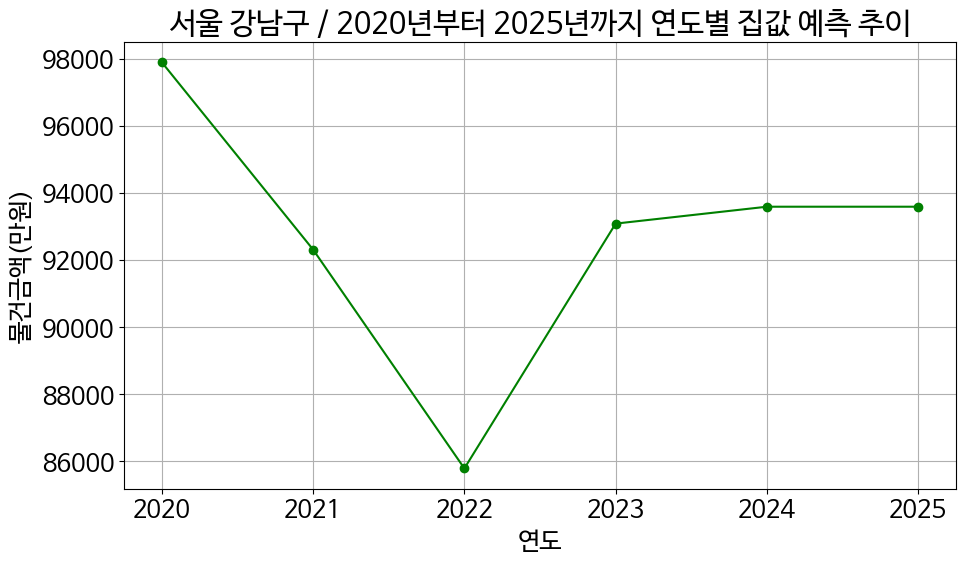

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
file_name = '/content/a.csv'
df = pd.read_csv(file_name, encoding='cp949')

# 결측값 대체
df.fillna(df.mean(), inplace=True)  # 결측값을 평균값으로 대체

# 사용할 특성 선택
X = df[['건물면적(㎡)', '토지면적(㎡)']]
y = df['물건금액(만원)']

# 선형 회귀 모델 초기화 및 학습 (2020년부터 2023년까지의 데이터로 학습)
model = LinearRegression()
model.fit(X[df['접수연도'] <= 2023], y[df['접수연도'] <= 2023])

# 시각화를 위한 데이터 생성
years = range(2020, 2026)  # 2020년부터 2025년까지 연도 범위
predicted_values = []  # 연도별 예측값을 담을 리스트

# 2020년부터 2023년까지의 예측값 계산
for year in years:
    # 예측을 위한 데이터 구성
    data = df[df['접수연도'] == year][['건물면적(㎡)', '토지면적(㎡)']]
    if not data.empty:
        predicted_value = model.predict(data).mean()
        predicted_values.append(predicted_value)
    else:
        # 해당 연도의 데이터가 없을 경우, 2000년부터 2023년까지의 학습 데이터로 예측
        predicted_value = model.predict(X[df['접수연도'] <= 2023]).mean()
        predicted_values.append(predicted_value)

# 선 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_values, marker='o', linestyle='-', color='green')
plt.xlabel('연도')
plt.ylabel('물건금액(만원)')
plt.title('서울 강남구 / 2020년부터 2025년까지 연도별 집값 예측 추이')
plt.grid(True)
plt.tight_layout()
plt.show()